## 01 - DGP and Synthetic Timeseries

- https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter01/01%20-%20DGP%20and%20Synthetic%20Timeseries.ipynb

In [1]:

import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
plt.style.use("seaborn-v0_8-whitegrid")
%matplotlib inline

pd.options.display.max_columns = 999

In [2]:
#!pip install git+https://github.com/TimeSynth/TimeSynth.git

In [3]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import timesynth as ts
import pandas as pd
np.random.seed()

In [4]:
def plot_time_series(time, values, label, legends=None):
    if legends is not None:
        assert len(legends)==len(values)
    if isinstance(values, list):
        series_dict = {"Time": time}
        for v, l in zip(values, legends):
            series_dict[l] = v
        plot_df = pd.DataFrame(series_dict)
        plot_df = pd.melt(plot_df,id_vars="Time",var_name="ts", value_name="Value")
    else:
        series_dict = {"Time": time, "Value": values, "ts":""}
        plot_df = pd.DataFrame(series_dict)
    
    if isinstance(values, list):
        fig = px.line(plot_df, x="Time", y="Value", line_dash="ts")
    else:
        fig = px.line(plot_df, x="Time", y="Value")
    fig.update_layout(
        autosize=False,
        width=900,
        height=400,
        title={
        'text': label,
#         'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        titlefont={
            "size": 25
        },
        yaxis=dict(
            title_text="Value",
            titlefont=dict(size=12),
        ),
        xaxis=dict(
            title_text="Time",
            titlefont=dict(size=12),
        )
    )
    return fig

In [5]:
def generate_timeseries(signal, noise=None):
    time_sampler = ts.TimeSampler(stop_time=20)
    regular_time_samples = time_sampler.sample_regular_time(num_points=100)
    timeseries = ts.TimeSeries(signal_generator=signal, noise_generator=noise)
    samples, signals, errors = timeseries.sample(regular_time_samples)
    return samples, regular_time_samples, signals, errors

시계열의 종류
- regular time series: 측정 시점이 규칙적
- irregular time series: 불규칙적

## Data-generating process (DGP) 
### Generating synthetic time series


#### White and red noise

In [6]:
# Generate the time axis with sequential numbers upto 200
time = np.arange(200)
# Sample 200 hundred random values
values = np.random.randn(200)*100

print(time)
print(values)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
[-5.21441080e+01 -2.95289598e+01 -6.76269983e+00 -2.50652899e+01
  8.64699875e+01  7.67529053e+00 -1.35419524e+01 -2.48435477e+02
  1.39432393e+02  9.04617187e+01  2.15153708e+01  1.41661

In [7]:
fig = plot_time_series(
    time = time, 
    values= values,
    label=""
    )
fig.show()

red noise : has zero mean and constant variance but is serially correlated in time.   
This serial correlation or redness is parameterized by a correlation coefficient r, such that:

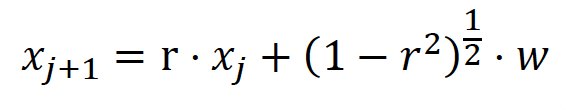

In [8]:
# Setting the correlation coefficient
r = 0.4
# Generate the time axis
time = np.arange(200)
# Generate white noise
white_noise = np.random.randn(200)*100
# Create Red Noise by introducing correlation between subsequent values in the white noise
values = np.zeros(200)
for i, v in enumerate(white_noise):
    if i==0:
        values[i] = v
    else:
        values[i] = r*values[i-1]+ np.sqrt((1-np.power(r,2))) *v

In [9]:
ig = plot_time_series(time, values, "")
fig.show()

#### Cyclical or seasonal signals

TimeSynth 라이브러리를 사용해보자.

In [10]:
#Sinusoidal Signal with Amplitude=1.5 & Frequency=0.25
signal_1 =ts.signals.Sinusoidal(amplitude=1.5, frequency=0.25)
#Sinusoidal Signal with Amplitude=1 & Frequency=0. 5
signal_2 = ts.signals.Sinusoidal(amplitude=1, frequency=0.5)

print(signal_1)

In [11]:
#Generating the time series
samples_1, regular_time_samples, signals_1, errors_1 = generate_timeseries(signal=signal_1)
samples_2, regular_time_samples, signals_2, errors_2 = generate_timeseries(signal=signal_2)

In [12]:
print(samples_1)

[ 0.00000000e+00  4.68050169e-01  8.89361894e-01  1.22186393e+00
  1.43235336e+00  1.49981119e+00  1.41750123e+00  1.19364276e+00
  8.50589796e-01  4.22598835e-01 -4.75919002e-02 -5.13030215e-01
 -9.27238479e-01 -1.24885478e+00 -1.44576324e+00 -1.49830101e+00
 -1.40122179e+00 -1.16421970e+00 -8.10961226e-01 -3.76721981e-01
  9.51358795e-02  5.57493683e-01  9.64181415e-01  1.27458814e+00
  1.45771735e+00  1.49528216e+00  1.38353144e+00  1.13362436e+00
  7.70516087e-01  3.30465799e-01 -1.42584065e-01 -6.01395803e-01
 -1.00015350e+00 -1.29903811e+00 -1.46820367e+00 -1.49075770e+00
 -1.36444799e+00 -1.10188756e+00 -7.29295104e-01 -2.83876867e-01
  1.89888680e-01  6.44692368e-01  1.03511852e+00  1.32218005e+00
  1.47721163e+00  1.48473216e+00  1.34399066e+00  1.06904126e+00
  6.87339783e-01  2.37002094e-01 -2.37002094e-01 -6.87339783e-01
 -1.06904126e+00 -1.34399066e+00 -1.48473216e+00 -1.47721163e+00
 -1.32218005e+00 -1.03511852e+00 -6.44692368e-01 -1.89888680e-01
  2.83876867e-01  7.29295

In [13]:
regular_time_samples

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [14]:
signal_1

In [15]:
errors_1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
fig = plot_time_series(
    time=regular_time_samples, 
    values=[samples_1, samples_2], 
    label="",
    legends=["Amplitude = 1.5 | Frequency = 0.25", "Amplitude = 1 | Frequency = 0.5"]
    )
fig.show()

#### Pseudo Periodic

In [17]:
# PseudoPeriodic signal with Amplitude=1 & Frequency=0.25
signal = ts.signals.PseudoPeriodic(amplitude=1, frequency=0.25)
#Generating Timeseries
samples, regular_time_samples, signals, errors = generate_timeseries(signal=signal)

In [18]:
fig = plot_time_series(
    time=regular_time_samples, 
    values=samples, 
    label=""
    )
fig.show()

#### ## Auto Regressive

In [19]:
# Autoregressive signal with parameters 1.5 and -0.75
# y(t) = 1.5*y(t-1) - 0.75*y(t-2)
signal=ts.signals.AutoRegressive(ar_param=[1.5, -0.75])
#Generate Timeseries
#samples, regular_time_samples, signals, errors = generate_timeseries(signal=signal)

- 동작안함

#### Mix and Match

In [20]:
#Generating Pseudo Periodic Signal
pseudo_samples, regular_time_samples, _, _ = generate_timeseries(signal=ts.signals.PseudoPeriodic(amplitude=1, frequency=0.25), noise=ts.noise.GaussianNoise(std=0.3))
# Generating an Autoregressive Signal
#ar_samples, regular_time_samples, _, _ = generate_timeseries(signal=ts.signals.AutoRegressive(ar_param=[1.5, -0.75]))
# Combining the two signals using a mathematical equation
#timeseries_ = pseudo_samples*2+ar_samples

- 동작 안함

### Stationary and non-stationary time series

#### Non-Stationary: Sinusoidal with Trend and White Noise

In [21]:
# Sinusoidal Signal with Amplitude=1 & Frequency=0.25
signal=ts.signals.Sinusoidal(amplitude=1, frequency=0.25)
# White Noise with standar deviation = 0.3
noise=ts.noise.GaussianNoise(std=0.3)
# Generate the time series
sinusoidal_samples, regular_time_samples, _, _ = generate_timeseries(signal=signal, noise=noise)
# Regular_time_samples is a linear incteasing time axis and can be used as a trend
trend = regular_time_samples*0.4
# Combining the signal and trend
timeseries_ = sinusoidal_samples+trend

In [22]:
fig = plot_time_series(
    time=regular_time_samples, 
    values=timeseries_,
    label=""
    )

fig.show()

#### Non-Stationary: Sinusoidal and Time Varying Noise

In [23]:
sinusoidal_samples, regular_time_samples, _, _ = generate_timeseries(signal=ts.signals.Sinusoidal(amplitude=1, frequency=0.25))
noise = [np.random.randn()*np.sqrt(i) for i, v in enumerate(regular_time_samples)]

In [24]:
fig = plot_time_series(
    time = regular_time_samples,
    values=sinusoidal_samples+noise,
    label=""
    )
fig.show()